# Proyecto Zuber - Empresa de plataforma de viajes

Descripción del proyecto:

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

In [ ]:
# WebScraping con ayuda de la librería BeautifulSoup

import requests
from bs4 import BeautifulSoup
import pandas as pd

URL='https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)   
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

## Tareas 
- **Estudiar los datos que contienen:** 
    -  Asegurarte de que los tipos de datos sean correctos. 

- **Identificar los 10 principales barrios en términos de finalización del recorrido.** 

- **Hacer gráficos:** 
    - Empresas de taxis y número de viajes. 
    - Los 10 barrios principales por número de finalizaciones. 
    - Sacar conclusiones basadas en cada gráfico. 
    - Explicar los resultados.

In [ ]:
#Aquí importaremos las librerías que estaremos usando para continuar con el análisis de los datos.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [4]:
co_trips = pd.read_csv(r'C:\Users\cesar\Desktop\Proyecto 8\moved_project_sql_result_01.csv')
avg_trips = pd.read_csv(r'C:\Users\cesar\Desktop\Proyecto 8\moved_project_sql_result_04.csv')
airport_travels = pd.read_csv(r'C:\Users\cesar\Desktop\Proyecto 8\moved_project_sql_result_07.csv')


In [5]:
co_trips.info()
plot_taxis = co_trips.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
#Vamos a definir aquí una función para conocer saber si hay valores duplicados en nuestros DataFrames,
#creamos dos listas "seen" y "duplicates"
#Por cada valor, vamos a añadirlos a una lista "seen" pero si éste ya fue añadido se añadirá a la lista "duplicates", al final imprimiremos 
#"duplicates" para ver aquellos valores duplicados

def find_duplicates(lst):
    seen = []
    duplicates = []
    for each in lst:
        if each in seen:
            duplicates.append(each)
        else: seen.append(each)
    return list(duplicates)

In [7]:
co_trips.apply(find_duplicates)

#Vemos que para la columna "company_name" no tenemos duplicados, pero para el número de viajes tenemos algunos dos o tres veces
#Pero ya que los nombres de las compañías no están duplicados, podemos intuir que el número de viajes es el valor "duplicado", por lo que podemos ignorarlo


company_name                                 []
trips_amount    [33, 29, 29, 21, 15, 14, 14, 7]
dtype: object

In [8]:
avg_trips.apply(find_duplicates)

#Aquí podemos ver que sólo la columna de "round_avg" nos arrojó duplicados, esto quizás debido a que el redondeo para arriba hizo que 
#algunos valores se repitieran, el mismo caso que con el primer DataFrame

,dropoff_location_name,average_trips


In [9]:
avg_trips.info()
avg_trips.head(10)
plot_trips = avg_trips.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
#Aquí vemos que los datos son números con decimal, ya que al momento de graficar ésto nos podría meter un poco
#de ruido vamos a aplicar un redondeo para arriba, al tratarse de promedios y no datos en crudo no debería suponer 
#nigún problema al momento de hacer el cambio

def redondeo_para_arriba(duracion):
    redondeo=np.ceil(duracion)
    return redondeo

In [11]:
avg_trips['round_avg'] = avg_trips['average_trips'].apply(redondeo_para_arriba).astype("int64")


### Ya que vemos que ambos gráficos han sido modificados, ahora sí vamos a proceder al análisis estadístico

## Barrios más concurridos

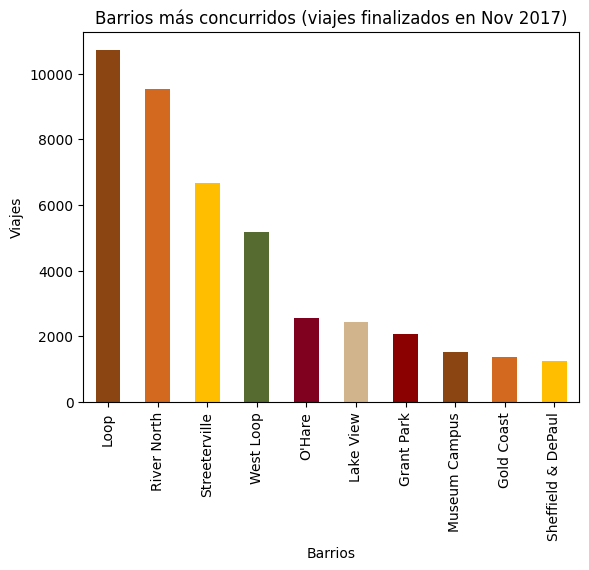

In [12]:
colors = ['#8B4513', '#D2691E', '#FFBF00', '#556B2F', '#800020', '#D2B48C', '#8B0000']
plot_trips.plot(kind='bar',
               x='dropoff_location_name',
               y='average_trips',
               color=colors,
               title='Barrios más concurridos (viajes finalizados en Nov 2017)',
               legend=False,
               xlabel='Barrios',
               ylabel='Viajes'
               )

plt.show()

Estos son los principales barrios donde los viajes finalizan, por lo que podemos estimar que son los más concurridos - no incluye paradas, por lo que valdría la pena revisar las duraciones promedio de cada viaje por barrio para estimar si fueron viajes de 1 solo destino  o hubo paradas en el inter.

## Ahora vamos a revisar las compañías de taxis con mayor número de viajes

Nos enfocaremos en las primeras 10, para tener un gráfico limpio y fácil de entender

C:\Users\cesar\AppData\Local\Temp\ipykernel_22004\3249006373.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


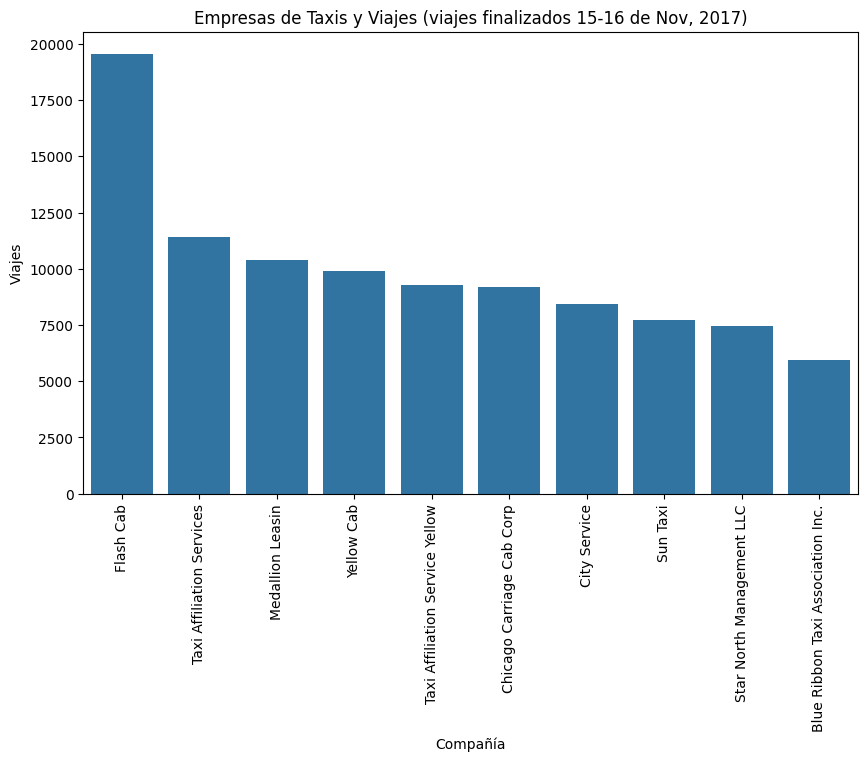

In [13]:

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='company_name',
                       y='trips_amount',
                       data=plot_taxis,
                       )
bar_plot.set_title('Empresas de Taxis y Viajes (viajes finalizados 15-16 de Nov, 2017)')
bar_plot.set_xlabel('Compañía')
bar_plot.set_ylabel('Viajes')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
plt.show()

Vemos que la compañía Flash Cab parece tener un mayor número de viajes en estas fechas, habrá que ver si hay una relación entre el número total de carros y los viajes que tiene cada compañía para saber cuál es la que genera mayores ganancias.


### Dado que las tablas que fueron recopiladas nos muestras información de diferentes temporalidades
#### (una incluye los viajes de todo el mes de Noviembre, y el otro sólo del 16 y 17 de Nov) no vamos a trabajar con los datos en conjunto ya que esto podría significar un sesgo importante al momento de usar una tabla junta para hacer cada tarea

In [14]:
#Aquí vamos a indagar respecto al último Df que creamos, con la información de los viajes entre Loop - O'Hare International Aiport
#Primero echemos un vistazo a los df
airport_travels.info()
airport_travels.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [15]:
#Debido a la naturaleza de la lista, no podemos comprobar si hay duplicados significativos, ya que los registros son del mes pero sólo 
#tenemos marcadores de tiempo, es muy probable en cualquier otro día se repitan.
#Si tuviéramos una lista completa podríamos guiarnos con IDs o algo similar, en este caso no tenemos
#por lo que trabajaremos la lista completa.

In [16]:
#Tenemos que corregir la columna 'start_ts' ya que tenemos información muy valiosa en un formato en el cual
#No nos permitirá un análisis adecuado, por lo que modificaremos el contenido en formato de tiempo

airport_travels['start_ts']= pd.to_datetime(airport_travels['start_ts'])
airport_travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [17]:
#Ya que tenemos la fecha en formato adecuado, vamos a crear una columna con el día, ya que para nuestro análisis sólo necesitaremos enfocarnos
#en los días "Sábado"
airport_travels['dow'] = airport_travels['start_ts'].dt.day_name(locale='es_ES')
airport_travels

#Al hacer el procesamiento noté que todos los días del DF corresponden al sábado, por lo que continuaremos con el análisis

,start_ts,weather_conditions,duration_seconds,dow
0,2017-11-25 16:00:00,Good,2410.0,Sábado
1,2017-11-25 14:00:00,Good,1920.0,Sábado
2,2017-11-25 12:00:00,Good,1543.0,Sábado
3,2017-11-04 10:00:00,Good,2512.0,Sábado
4,2017-11-11 07:00:00,Good,1440.0,Sábado
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Sábado
1064,2017-11-11 10:00:00,Good,1318.0,Sábado
1065,2017-11-11 13:00:00,Good,2100.0,Sábado
1066,2017-11-11 08:00:00,Good,1380.0,Sábado


### Ahora que tenemos nuestra DataFrame trabajada, procederemos a responder el último apartado del Proyecto:

#### Prueba la hipótesis:


> "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".


Pimero vamos a plantear las hipótesis, nula y alternativa:

H0 = "La duración promedio de los viajes desde el Loop hasta el Aeropuero Internacional O'Hare cambia los sábados lluviosos."

H1 = "La duración promedio de los viajes desde el Loop hasta el Aeropuero Internacional O'Hare NO cambia los sábados lluviosos."

In [39]:
#Primero agruparemos nuestros datos, ya que tenemos que trabajar con 2 variables ("sábado" y "bad" y después por "sábado" y "good")

rainy_days = airport_travels.query("weather_conditions == 'Bad'").drop(columns=["start_ts","dow"]).reset_index()
good_days = airport_travels.query("weather_conditions == 'Good'").drop(columns=["start_ts","dow"]).reset_index()

mean_dur_good = good_days['duration_seconds'].mean()
mean_dur_rainy = rainy_days['duration_seconds'].mean()

print(f"La duración media de los viajes en días con buen clima es de:", mean_dur_good)
print(f"La duración media de los viajes en días lluviosos es de:", mean_dur_rainy)


La duración media de los viajes en días con buen clima es de: 1999.6756756756756
La duración media de los viajes en días lluviosos es de: 2427.2055555555557


Ahora analizaremos con un test de Levene si las varianzas de nuestras muestras es distintas

H0 = Las varianzas de nuestras muestras son iguales 

H1 = Las varianzas de nuestras muestras NO son iguales

In [46]:
#Primero con un test de levene vamos a analizar la varianza de cada uno de nuestros DFs, después podemos con base en la información ver qué
#otro análisis estadístico aplicar para obtener los datos fiables

alpha = 0.05

var_value = st.levene(good_days['duration_seconds'], rainy_days['duration_seconds'])

print('valor p:', var_value.pvalue)

if (var_value.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.5332038671974493
No podemos rechazar la hipótesis nula


Con un valor p = 0.53320, no podemos rechazar la hipótesis nula, por lo que las varianzas de las muestras son estadísticamente similares.

In [49]:
alpha = 0.05
results = st.ttest_ind(good_days['duration_seconds'], rainy_days['duration_seconds'], equal_var=True)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


Con un Valor p = 6.517907
Rechazamos la hipótesis nula, por lo que podemos decir que:

La duración promedio de los viajes desde el Loop hasta el Aeropuero Internacional O'Hare NO cambia los sábados lluviosos.

# Conclusiones Generales

## Encontramos que los principales Barrios donde finalizan los viajes que inician en el Aeropuerto Internacional O'Hare son:
1. Loop
2. Rivernorth
3. Streeterville 
4. West Loop
5. O'Hare

Y la principal empresa de Taxis (con base en mayor número de viajes) es:
- Flash Cab

Con base en la información obtenida, también podemos -estadísticamente- decir que la duración promedio de los viajes los sábados es igual independientemente del clima.